<a href="https://colab.research.google.com/github/MahfuzaRU/Artificial-Intelligence/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

building a FCFNN based 10 class classifier
training and testing the classifier by using MNIST dataset

In [13]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [14]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# One-hot encode the labels (0-9 -> vector of length 10)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [15]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
1688/1688 - 8s - 5ms/step - accuracy: 0.9276 - loss: 0.2485 - val_accuracy: 0.9675 - val_loss: 0.1195
Epoch 2/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9685 - loss: 0.1048 - val_accuracy: 0.9745 - val_loss: 0.0868
Epoch 3/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9761 - loss: 0.0728 - val_accuracy: 0.9773 - val_loss: 0.0826
Epoch 4/10
1688/1688 - 11s - 6ms/step - accuracy: 0.9826 - loss: 0.0546 - val_accuracy: 0.9792 - val_loss: 0.0770
Epoch 5/10
1688/1688 - 11s - 7ms/step - accuracy: 0.9863 - loss: 0.0416 - val_accuracy: 0.9785 - val_loss: 0.0792
Epoch 6/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9887 - loss: 0.0339 - val_accuracy: 0.9808 - val_loss: 0.0799
Epoch 7/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9902 - loss: 0.0288 - val_accuracy: 0.9785 - val_loss: 0.0959
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9778 - val_loss: 0.0945
Epoch 9/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.979

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 97.31%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


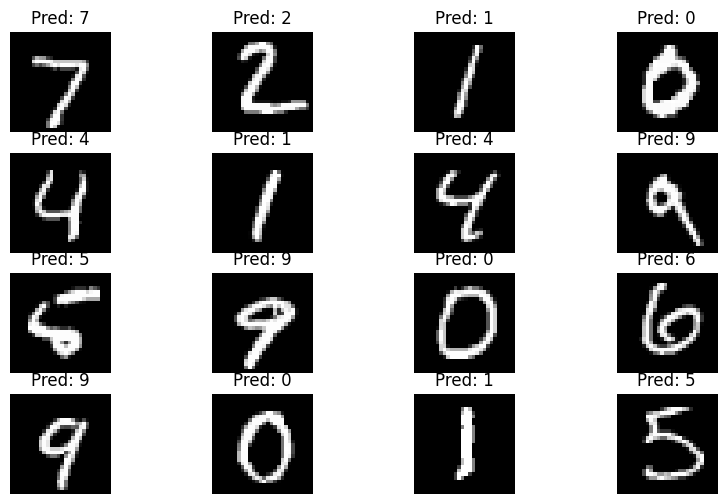

In [19]:
predictions = model.predict(X_test[:16])

plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.savefig("predictions.png")

plt.show()

In [20]:

from google.colab import files
files.download("predictions.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>